In [1]:
# importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading data
data = pd.read_csv("gas_turbines.csv")

In [5]:
# backup original data
df = data.copy()

##### Data Exploration

In [6]:
df.shape

(1894, 11)

In [7]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [8]:
df.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1889,16.279,986.41,90.004,6.0426,30.802,1100.0,539.17,153.24,13.270,0.56837,70.274
1890,16.180,986.78,91.271,6.1409,31.538,1100.0,537.00,154.86,13.425,0.19455,67.376
1891,15.912,987.31,89.916,6.1009,31.008,1099.9,538.72,154.04,13.313,0.51582,69.872
1892,14.705,988.50,95.944,5.6836,27.074,1092.7,546.94,142.53,12.357,0.46834,74.955
1893,14.247,989.93,97.970,4.9745,22.314,1071.2,550.11,123.76,11.213,1.79770,73.100


In [9]:
df.sample(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
575,4.3607,1027.80,87.073,5.9956,34.562,1100.1,523.72,167.74,14.367,0.45674,61.880
1806,19.7950,996.52,78.993,5.9291,29.905,1098.2,539.87,150.67,13.142,0.90323,67.915
444,11.6910,1000.60,95.822,4.5764,24.501,1085.6,549.72,134.44,11.805,1.64470,77.159
667,7.9048,1012.00,84.802,5.7948,32.915,1100.0,529.41,161.98,13.951,0.29944,69.414
537,3.6891,1020.40,92.993,4.6028,23.558,1081.2,549.97,131.01,11.692,1.84130,92.574


##### Quick Data Check

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      1894 non-null   float64
 1   AP      1894 non-null   float64
 2   AH      1894 non-null   float64
 3   AFDP    1894 non-null   float64
 4   GTEP    1894 non-null   float64
 5   TIT     1894 non-null   float64
 6   TAT     1894 non-null   float64
 7   TEY     1894 non-null   float64
 8   CDP     1894 non-null   float64
 9   CO      1894 non-null   float64
 10  NOX     1894 non-null   float64
dtypes: float64(11)
memory usage: 162.9 KB


##### Statistical summary

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,1894.0,10.328789,4.672649,0.52230,7.030675,9.62600,13.53575,23.4180
AP,1894.0,1013.669192,9.279813,985.85000,1007.125000,1014.20000,1021.10000,1031.8000
AH,1894.0,81.506284,11.541158,39.99100,73.953500,83.74600,90.14800,100.1800
AFDP,1894.0,4.938156,0.794795,3.45950,4.231525,4.77660,5.76610,7.5549
GTEP,1894.0,26.575212,5.210236,18.23900,23.544000,24.63150,32.40450,37.4020
TIT,1894.0,1082.906600,19.627792,1025.60000,1080.350000,1086.60000,1099.90000,1100.8000
TAT,1894.0,540.904314,9.954691,513.06000,530.705000,545.74000,549.96000,550.4000
TEY,1894.0,139.478807,19.040129,102.76000,131.835000,134.69000,159.72750,174.6100
CDP,1894.0,12.368462,1.335843,9.92860,11.688250,11.94300,13.81900,15.0810
CO,1894.0,2.163395,3.222324,0.01644,0.723275,1.31715,2.06555,44.1030


In [12]:
df.nunique()

AT      1844
AP       428
AH      1832
AFDP    1805
GTEP    1671
TIT      426
TAT      962
TEY     1214
CDP     1255
CO      1852
NOX     1831
dtype: int64

##### Data Preprocessing

##### Identifying Duplicates

In [13]:
df.duplicated().sum()

0

##### Identifying Missing Values

In [14]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

##### Identifying Outliers

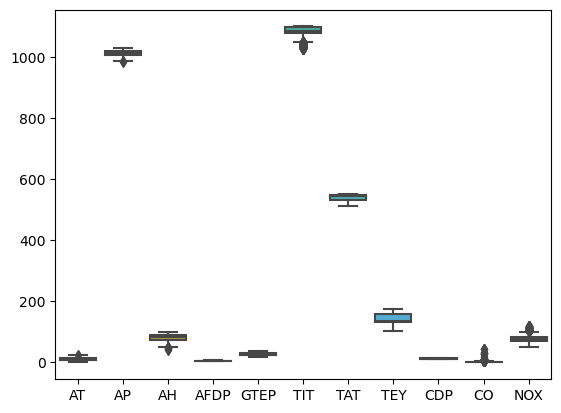

In [15]:
sns.boxplot(data=df);

##### Data Visualization

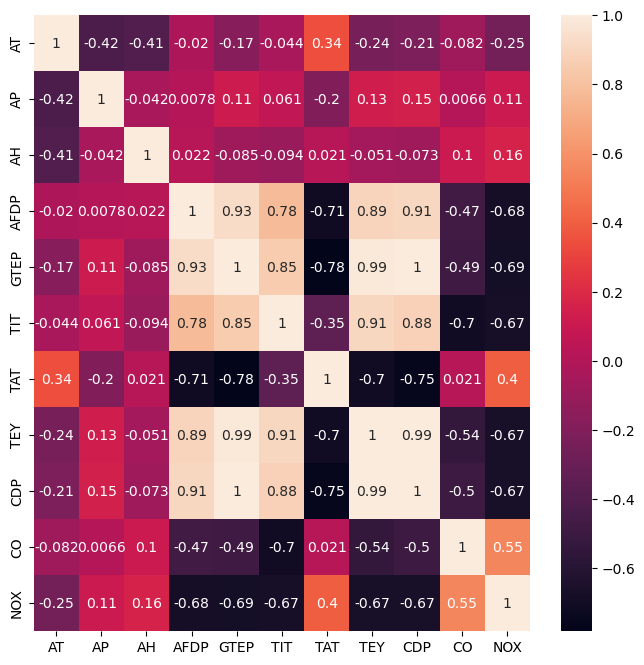

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

###### Correlation with Target Column

In [17]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.993865
GTEP    0.985358
TIT     0.907356
AFDP    0.891566
AP      0.133683
AH     -0.051220
AT     -0.241346
CO     -0.539256
NOX    -0.666780
TAT    -0.702932
Name: TEY, dtype: float64

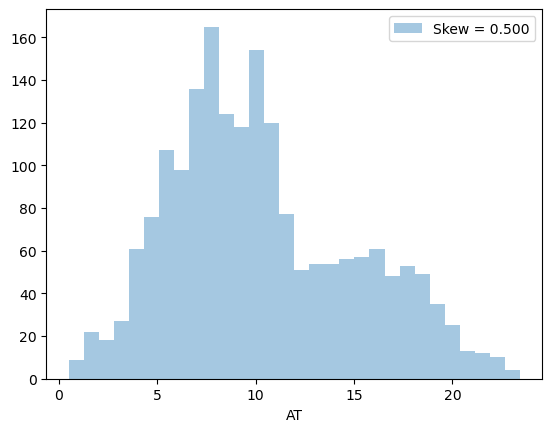

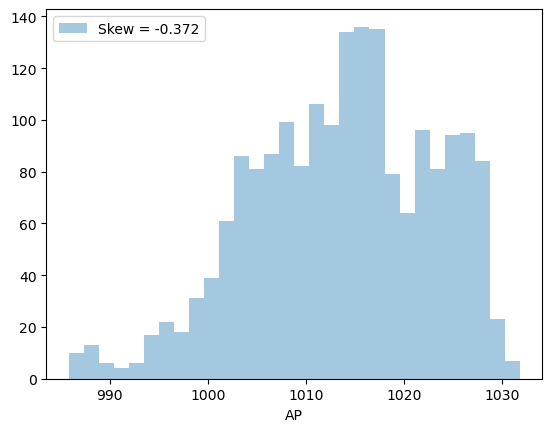

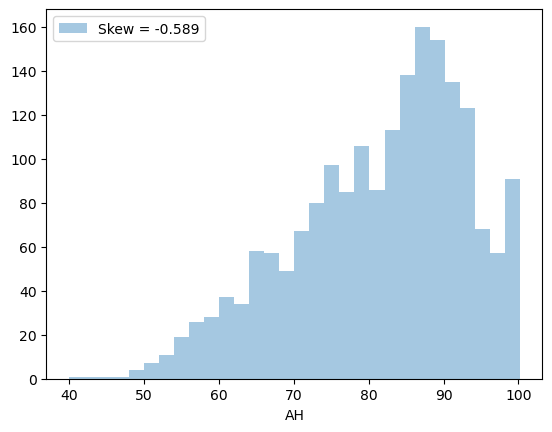

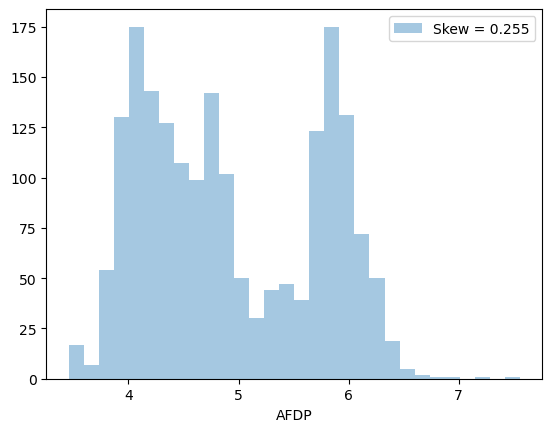

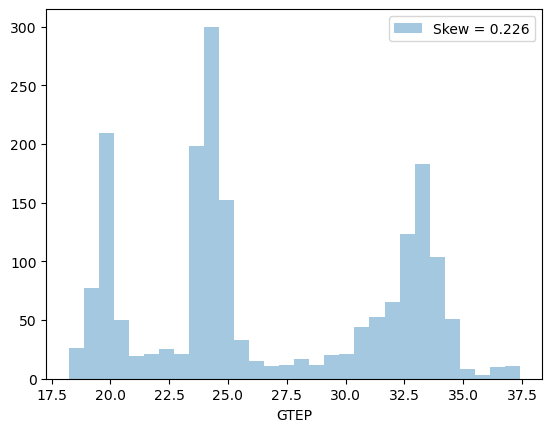

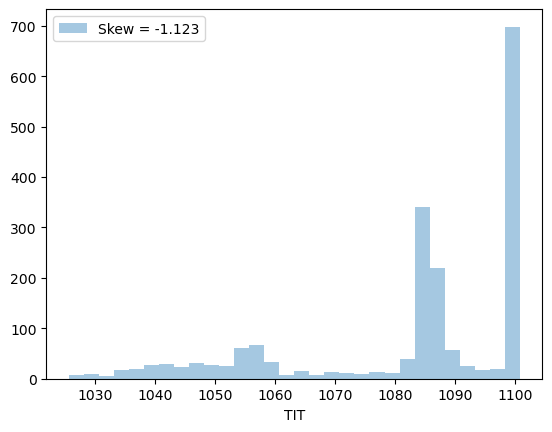

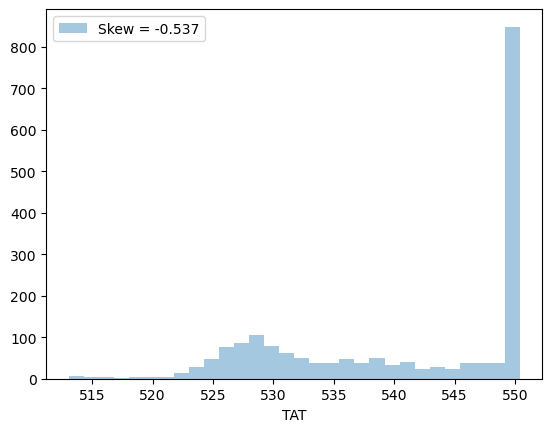

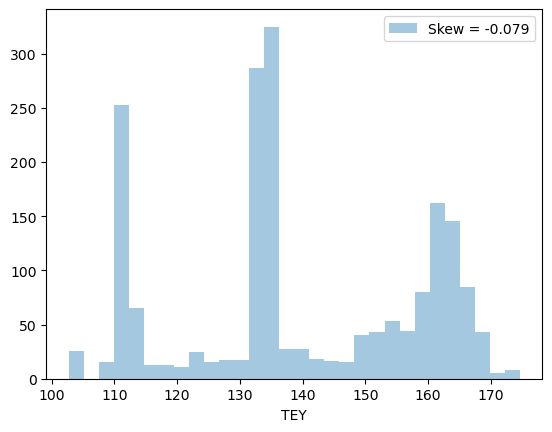

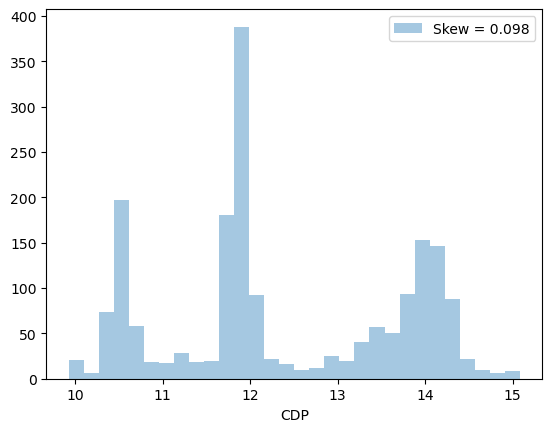

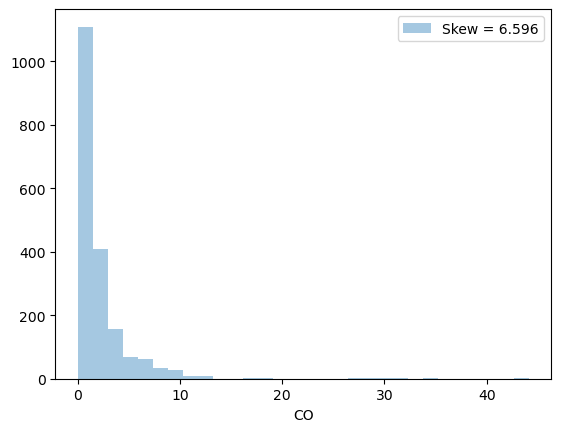

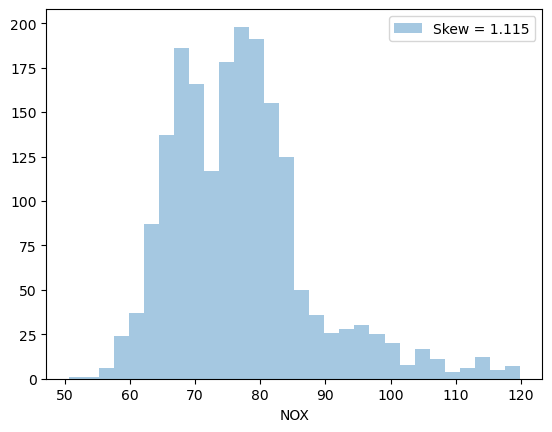

In [18]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

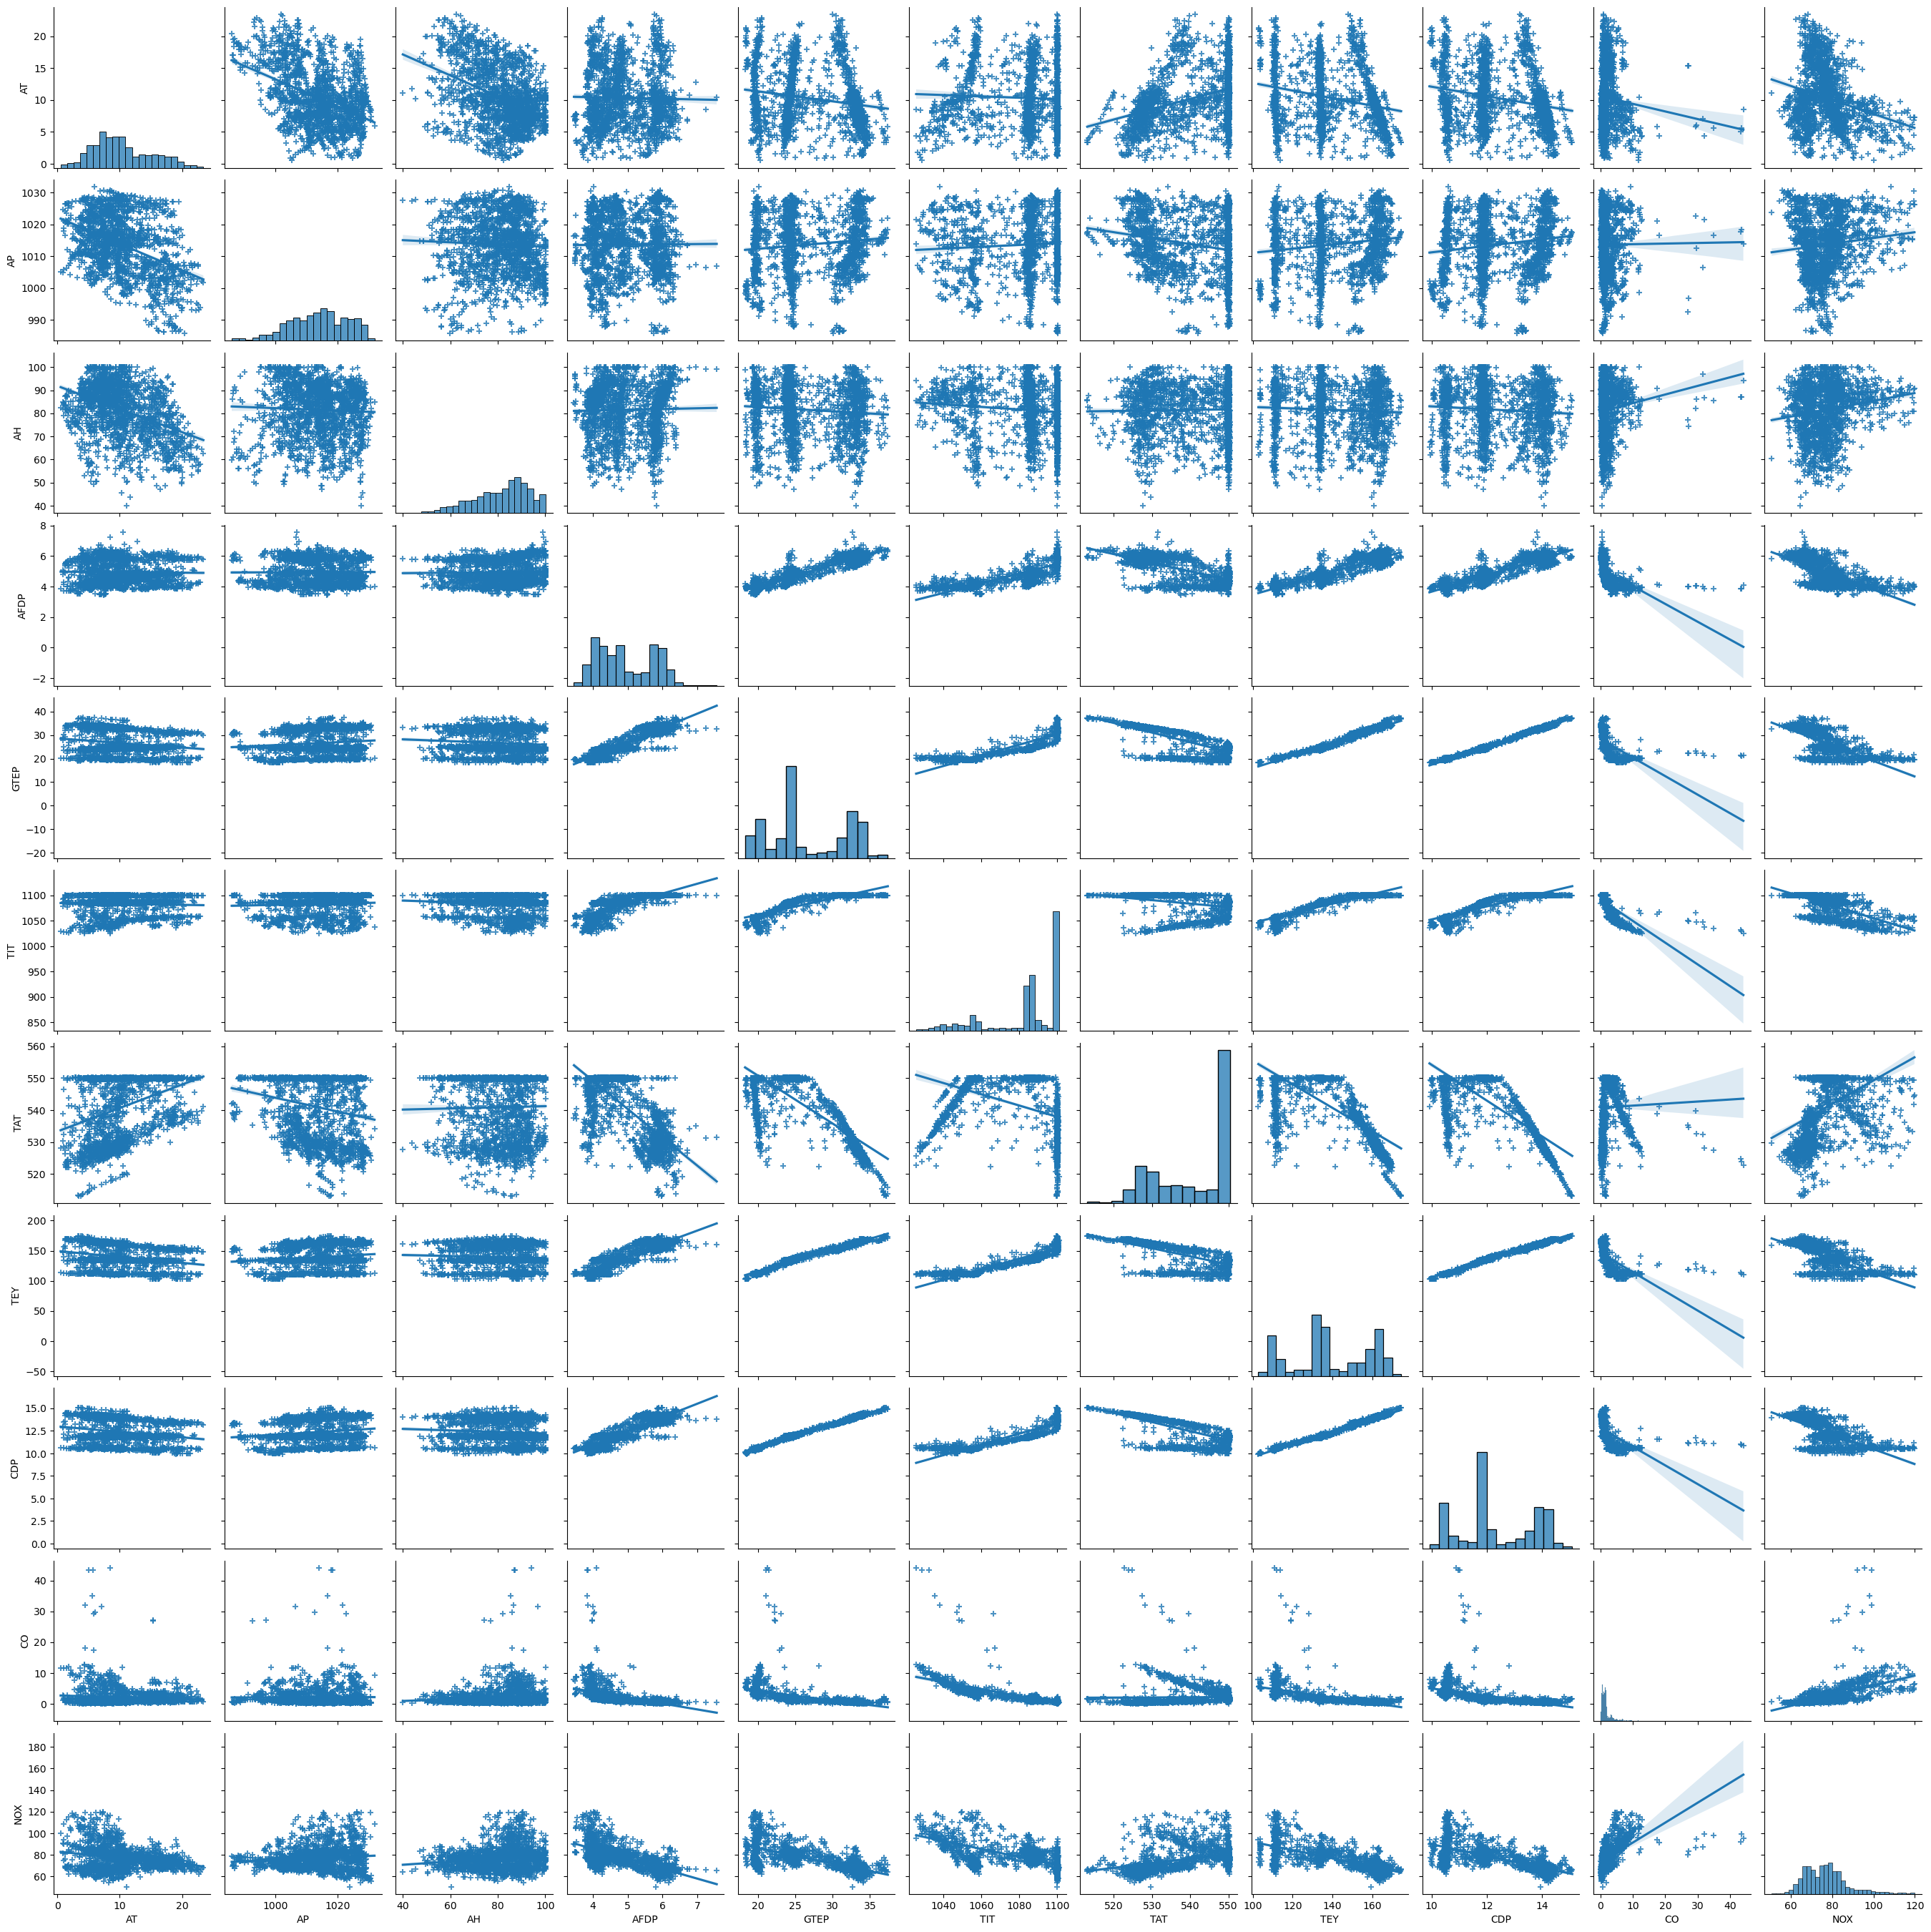

In [19]:
sns.pairplot(df,markers="+",kind='reg', diag_kind="auto")

##### Data Splitting

In [20]:
X = df.drop(["TEY"],axis=1).values
y = df["TEY"].values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

In [23]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (1515, 10)
Shape of X_test:  (379, 10)
Shape of y_train:  (1515,)
Shape of y_test: (379,)


##### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###### Model Selection

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))

#Binary Classification
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

##### Model Training

In [30]:
model.fit(x=X_train,y=y_train,epochs=100)

Epoch 1/100
48/48 [==============================] - 2s 3ms/step - loss: 19780.2676 - mse: 19780.2676 - mae: 139.3088
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 19532.7637 - mse: 19532.7637 - mae: 138.3826
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 19044.6523 - mse: 19044.6523 - mae: 136.5791
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 18088.5039 - mse: 18088.5039 - mae: 133.0469
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 16209.7510 - mse: 16209.7510 - mae: 125.9939
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 13109.9883 - mse: 13109.9883 - mae: 113.3493
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 9309.0137 - mse: 9309.0137 - mae: 94.5110
Epoch 8/100
48/48 [==============================] - 0s 3ms/step - loss: 6060.8608 - mse: 6060.8608 - mae: 71.9677
Epoch 9/100
48/48 [==============================] - 0s 3ms/st

48/48 [==============================] - 0s 3ms/step - loss: 70.0823 - mse: 70.0823 - mae: 4.7651
Epoch 74/100
48/48 [==============================] - 0s 3ms/step - loss: 68.1763 - mse: 68.1763 - mae: 4.6541
Epoch 75/100
48/48 [==============================] - 0s 3ms/step - loss: 66.2805 - mse: 66.2805 - mae: 4.6019
Epoch 76/100
48/48 [==============================] - 0s 3ms/step - loss: 64.7219 - mse: 64.7219 - mae: 4.4976
Epoch 77/100
48/48 [==============================] - 0s 3ms/step - loss: 62.9562 - mse: 62.9562 - mae: 4.4627
Epoch 78/100
48/48 [==============================] - 0s 3ms/step - loss: 61.1200 - mse: 61.1200 - mae: 4.3908
Epoch 79/100
48/48 [==============================] - 0s 3ms/step - loss: 59.3509 - mse: 59.3509 - mae: 4.3144
Epoch 80/100
48/48 [==============================] - 0s 3ms/step - loss: 57.2250 - mse: 57.2250 - mae: 4.2329
Epoch 81/100
48/48 [==============================] - 0s 3ms/step - loss: 55.6944 - mse: 55.6944 - mae: 4.1858
Epoch 82/100
4

In [31]:
model.history.history

{'loss': [19780.267578125,
  19532.763671875,
  19044.65234375,
  18088.50390625,
  16209.7509765625,
  13109.98828125,
  9309.013671875,
  6060.86083984375,
  4113.39794921875,
  2988.259765625,
  2162.941650390625,
  1550.4056396484375,
  1108.5052490234375,
  798.1442260742188,
  585.0310668945312,
  443.092529296875,
  347.8251953125,
  284.7198181152344,
  242.88525390625,
  215.399169921875,
  196.86163330078125,
  184.26837158203125,
  175.3905792236328,
  168.89303588867188,
  163.82839965820312,
  159.46363830566406,
  155.81646728515625,
  152.69688415527344,
  149.8415069580078,
  147.20974731445312,
  144.743408203125,
  142.19700622558594,
  140.13473510742188,
  138.00650024414062,
  135.76382446289062,
  133.70721435546875,
  131.68821716308594,
  129.86839294433594,
  127.75006103515625,
  125.94709014892578,
  124.29476165771484,
  122.39372253417969,
  120.54930877685547,
  118.76302337646484,
  116.90850830078125,
  115.5248794555664,
  113.86540985107422,
  111.9508

In [32]:
performance = pd.DataFrame(model.history.history)

In [33]:
performance

,loss,mse,mae
0,19780.267578,19780.267578,139.308823
1,19532.763672,19532.763672,138.382568
2,19044.652344,19044.652344,136.579102
3,18088.503906,18088.503906,133.046875
4,16209.750977,16209.750977,125.993904
...,...,...,...
95,33.921234,33.921234,3.373514
96,32.953972,32.953972,3.332131
97,31.944790,31.944790,3.287241
98,30.662071,30.662071,3.231134


<Axes: >

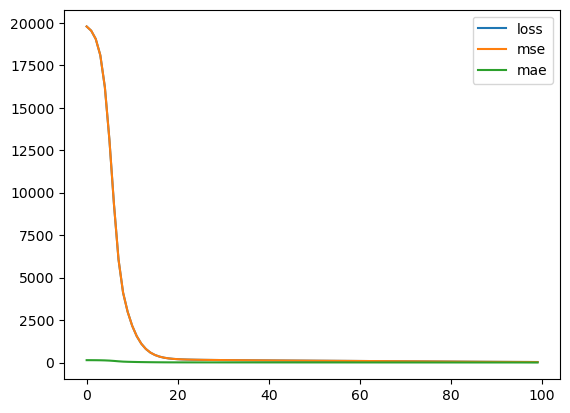

In [34]:
performance.plot()

##### Retrain Model

In [35]:
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))

#Binary Classification
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [38]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/100
48/48 [==============================] - 2s 11ms/step - loss: 20011.3320 - mse: 20011.3320 - mae: 140.1987 - val_loss: 19586.5137 - val_mse: 19586.5137 - val_mae: 138.7088
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 19909.9766 - mse: 19909.9766 - mae: 139.8231 - val_loss: 19509.6250 - val_mse: 19509.6250 - val_mae: 138.4154
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 19850.0547 - mse: 19850.0547 - mae: 139.5971 - val_loss: 19458.8320 - val_mse: 19458.8320 - val_mae: 138.2250
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 19801.8770 - mse: 19801.8770 - mae: 139.4234 - val_loss: 19407.4609 - val_mse: 19407.4609 - val_mae: 138.0417
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 19730.6777 - mse: 19730.6777 - mae: 139.1764 - val_loss: 19309.9863 - val_mse: 19309.9863 - val_mae: 137.7024
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 19565.3203 

48/48 [==============================] - 0s 4ms/step - loss: 135.6413 - mse: 135.6413 - mae: 7.3121 - val_loss: 213.4862 - val_mse: 213.4862 - val_mae: 8.2401
Epoch 48/100
48/48 [==============================] - 0s 4ms/step - loss: 132.7116 - mse: 132.7116 - mae: 7.2241 - val_loss: 208.9823 - val_mse: 208.9823 - val_mae: 8.0935
Epoch 49/100
48/48 [==============================] - 0s 4ms/step - loss: 129.8548 - mse: 129.8548 - mae: 7.0908 - val_loss: 204.9841 - val_mse: 204.9841 - val_mae: 8.0664
Epoch 50/100
48/48 [==============================] - 0s 6ms/step - loss: 126.8847 - mse: 126.8847 - mae: 7.0360 - val_loss: 200.4067 - val_mse: 200.4067 - val_mae: 7.9379
Epoch 51/100
48/48 [==============================] - 0s 4ms/step - loss: 124.0350 - mse: 124.0350 - mae: 6.8960 - val_loss: 195.9186 - val_mse: 195.9186 - val_mae: 7.8214
Epoch 52/100
48/48 [==============================] - 0s 4ms/step - loss: 121.4636 - mse: 121.4636 - mae: 6.8208 - val_loss: 191.4954 - val_mse: 191.4954

48/48 [==============================] - 0s 4ms/step - loss: 34.1901 - mse: 34.1901 - mae: 3.4309 - val_loss: 41.1581 - val_mse: 41.1581 - val_mae: 3.8223
Epoch 96/100
48/48 [==============================] - 0s 4ms/step - loss: 32.8261 - mse: 32.8261 - mae: 3.3664 - val_loss: 39.0769 - val_mse: 39.0769 - val_mae: 3.7405
Epoch 97/100
48/48 [==============================] - 0s 4ms/step - loss: 31.4305 - mse: 31.4305 - mae: 3.3131 - val_loss: 37.1267 - val_mse: 37.1267 - val_mae: 3.6855
Epoch 98/100
48/48 [==============================] - 0s 4ms/step - loss: 30.0660 - mse: 30.0660 - mae: 3.2712 - val_loss: 35.5275 - val_mse: 35.5275 - val_mae: 3.6127
Epoch 99/100
48/48 [==============================] - 0s 4ms/step - loss: 28.8606 - mse: 28.8606 - mae: 3.1889 - val_loss: 34.0456 - val_mse: 34.0456 - val_mae: 3.5263
Epoch 100/100
48/48 [==============================] - 0s 4ms/step - loss: 27.5714 - mse: 27.5714 - mae: 3.1502 - val_loss: 32.1913 - val_mse: 32.1913 - val_mae: 3.4853


In [39]:
model.history.history

{'loss': [20011.33203125,
  19909.9765625,
  19850.0546875,
  19801.876953125,
  19730.677734375,
  19565.3203125,
  19162.021484375,
  18258.857421875,
  16552.380859375,
  13688.9453125,
  10033.8125,
  6727.7353515625,
  4761.94677734375,
  3667.818603515625,
  2890.386474609375,
  2305.10302734375,
  1808.2740478515625,
  1381.6085205078125,
  1031.793701171875,
  766.7581787109375,
  577.5072021484375,
  451.4695129394531,
  367.6935729980469,
  313.994873046875,
  279.00811767578125,
  253.907958984375,
  237.1804656982422,
  224.91078186035156,
  215.77133178710938,
  207.94662475585938,
  200.55471801757812,
  194.4142608642578,
  189.32473754882812,
  183.74765014648438,
  179.0031280517578,
  174.47198486328125,
  170.08444213867188,
  166.22943115234375,
  162.1652069091797,
  158.5054931640625,
  154.87599182128906,
  151.3939208984375,
  148.00543212890625,
  144.56040954589844,
  141.77137756347656,
  138.8560028076172,
  135.6412811279297,
  132.71163940429688,
  129.854

<Axes: >

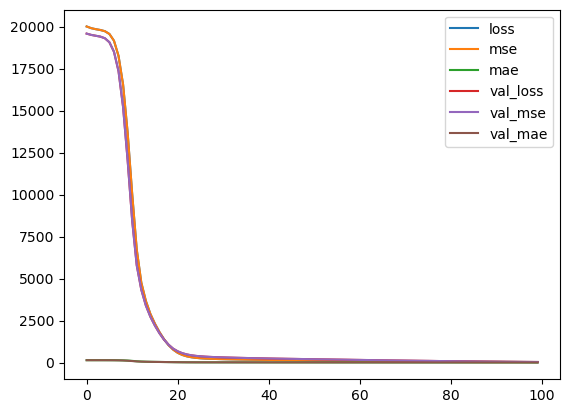

In [40]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

##### Retrain Model

In [41]:
from tensorflow.keras.layers import Dropout

In [42]:
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [43]:
model.fit(x=X_train, y=y_train, epochs=100,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/100
48/48 [==============================] - 2s 10ms/step - loss: 19875.3086 - mse: 19875.3086 - mae: 139.6799 - val_loss: 19506.7344 - val_mse: 19506.7344 - val_mae: 138.3956
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 19838.6758 - mse: 19838.6758 - mae: 139.5470 - val_loss: 19450.7891 - val_mse: 19450.7891 - val_mae: 138.1821
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 19743.7988 - mse: 19743.7988 - mae: 139.1754 - val_loss: 19293.4863 - val_mse: 19293.4863 - val_mae: 137.5683
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 19540.4414 - mse: 19540.4414 - mae: 138.3668 - val_loss: 19030.9297 - val_mse: 19030.9297 - val_mae: 136.5354
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 19202.4453 - mse: 19202.4453 - mae: 136.9766 - val_loss: 18596.0059 - val_mse: 18596.0059 - val_mae: 134.8024
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 18682.0176 

48/48 [==============================] - 0s 5ms/step - loss: 9871.0693 - mse: 9871.0693 - mae: 88.1933 - val_loss: 5354.6294 - val_mse: 5354.6294 - val_mae: 72.1826
Epoch 47/100
48/48 [==============================] - 0s 4ms/step - loss: 9473.8916 - mse: 9473.8916 - mae: 85.3119 - val_loss: 5318.3662 - val_mse: 5318.3662 - val_mae: 71.8771
Epoch 48/100
48/48 [==============================] - 0s 5ms/step - loss: 9641.6562 - mse: 9641.6562 - mae: 86.8377 - val_loss: 5131.4341 - val_mse: 5131.4341 - val_mae: 70.5477
Epoch 49/100
48/48 [==============================] - 0s 4ms/step - loss: 9589.8789 - mse: 9589.8789 - mae: 85.8696 - val_loss: 5182.0596 - val_mse: 5182.0596 - val_mae: 70.9470
Epoch 50/100
48/48 [==============================] - 0s 5ms/step - loss: 9730.7842 - mse: 9730.7842 - mae: 86.9292 - val_loss: 5419.8896 - val_mse: 5419.8896 - val_mae: 72.5249
Epoch 51/100
48/48 [==============================] - 0s 4ms/step - loss: 9410.0273 - mse: 9410.0273 - mae: 85.0489 - val_l

48/48 [==============================] - 0s 4ms/step - loss: 8845.0479 - mse: 8845.0479 - mae: 81.8319 - val_loss: 4072.3984 - val_mse: 4072.3984 - val_mae: 63.1049
Epoch 93/100
48/48 [==============================] - 0s 4ms/step - loss: 7945.3794 - mse: 7945.3794 - mae: 76.8822 - val_loss: 3949.7278 - val_mse: 3949.7278 - val_mae: 62.0853
Epoch 94/100
48/48 [==============================] - 0s 4ms/step - loss: 8297.3555 - mse: 8297.3555 - mae: 79.0725 - val_loss: 3873.4099 - val_mse: 3873.4099 - val_mae: 61.4696
Epoch 95/100
48/48 [==============================] - 0s 4ms/step - loss: 8495.3506 - mse: 8495.3506 - mae: 79.3898 - val_loss: 3870.5740 - val_mse: 3870.5740 - val_mae: 61.4028
Epoch 96/100
48/48 [==============================] - 0s 4ms/step - loss: 8354.1064 - mse: 8354.1064 - mae: 78.5429 - val_loss: 3982.8696 - val_mse: 3982.8696 - val_mae: 62.2636
Epoch 97/100
48/48 [==============================] - 0s 5ms/step - loss: 8356.0029 - mse: 8356.0029 - mae: 78.9970 - val_l

In [44]:
model.history.history

{'loss': [19875.30859375,
  19838.67578125,
  19743.798828125,
  19540.44140625,
  19202.4453125,
  18682.017578125,
  17487.607421875,
  15736.595703125,
  13615.78125,
  13028.48828125,
  12449.2294921875,
  12295.689453125,
  11927.7099609375,
  11660.6826171875,
  11352.740234375,
  11157.88671875,
  11524.3525390625,
  11521.279296875,
  11285.0927734375,
  11488.607421875,
  10755.1865234375,
  11075.3447265625,
  10932.7548828125,
  10303.078125,
  10833.353515625,
  10552.3916015625,
  11063.2685546875,
  10690.6357421875,
  10410.5166015625,
  9904.861328125,
  10306.6083984375,
  10171.1552734375,
  10253.2919921875,
  10320.4208984375,
  10325.935546875,
  10237.255859375,
  10681.6748046875,
  10090.2470703125,
  10170.693359375,
  9991.3291015625,
  9604.06640625,
  9792.01171875,
  10128.62890625,
  9699.359375,
  9265.2724609375,
  9871.0693359375,
  9473.8916015625,
  9641.65625,
  9589.87890625,
  9730.7841796875,
  9410.02734375,
  9635.16796875,
  9649.1630859375,
  

In [45]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

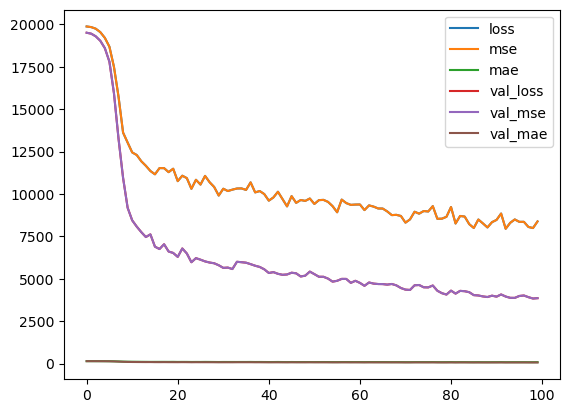

In [46]:
model_loss.plot()

##### Hyperparametr tuning

In [47]:
def toFindBestParams(X_train, y_train, X_test, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    # Initialize an empty DataFrame to store results
    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Create ANN model
            model = Sequential()

            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer='adam', loss='mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train, batch_size=batch_trial, epochs=epochs_trial, verbose=0)

            # Calculate MAPE
            MAPE = np.mean(100 * (np.abs(y_test - model.predict(X_test)) / y_test))

            # Create a new row with current batch size, epochs, and accuracy
            new_row = pd.DataFrame([[batch_trial, epochs_trial, 100 - MAPE]], columns=['batchsize', 'epochs', 'Accuracy'])

            # Concat the new row to the bestParamTable DataFrame
            bestParamTable = pd.concat([bestParamTable, new_row], ignore_index=True)

            # Print results
            print('batch_size:', batch_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', 100 - MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(X_train, y_train, X_test, y_test)
finalParamTable

12/12 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 5 Accuracy: 24.69274816858554
12/12 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: 45.054540615284836
12/12 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 50 Accuracy: 84.39345594925746
12/12 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: 84.44791449106997
12/12 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: 13.695673826203645
12/12 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: 24.908983715620124
12/12 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: 87.22175678508873
12/12 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: 84.31541222505871
12/12 [==============================] - 0s 3ms/step
batch_size: 15 - epochs: 5 Accuracy: 9.731847797835044
12/12 [==============

,batchsize,epochs,Accuracy
0,5,5,24.692748
1,5,10,45.054541
2,5,50,84.393456
3,5,100,84.447914
4,10,5,13.695674
5,10,10,24.908984
6,10,50,87.221757
7,10,100,84.315412
8,15,5,9.731848
9,15,10,17.346277


In [48]:
# getting corresponding row values of the maximum value of 'Accuracy' column
finalParamTable = finalParamTable.reset_index()
#print(finalParamTable_1)
#print(finalParamTable['Accuracy'].idxmax())
finalParamTable.iloc[finalParamTable['Accuracy'].idxmax()]

index         11.000000
batchsize     15.000000
epochs       100.000000
Accuracy      88.076287
Name: 11, dtype: float64

##### Training Model - using best params

In [49]:
model = Sequential()

model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))

#Binary Classification
model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [50]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(X_train,y_train, batch_size=20 , epochs = 100, verbose=0)

In [51]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

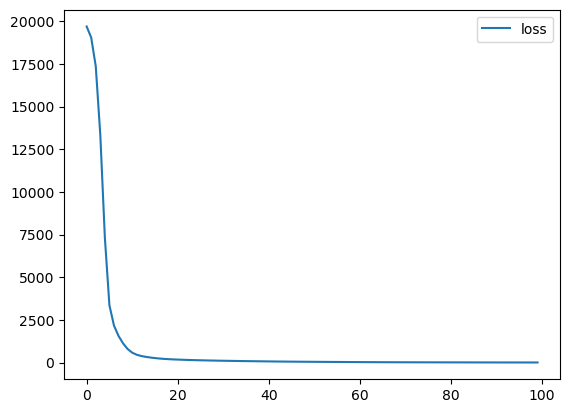

In [52]:
model_loss.plot()

##### Model Evaluation

In [53]:
predictions = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [54]:
predictions

array([[154.12251 ],
       [105.24041 ],
       [163.93001 ],
       [161.57567 ],
       [156.7289  ],
       [153.25288 ],
       [111.806816],
       [168.50755 ],
       [109.424995],
       [134.85564 ],
       [109.97556 ],
       [150.69292 ],
       [165.40788 ],
       [113.01546 ],
       [152.4188  ],
       [161.10081 ],
       [132.59814 ],
       [122.51928 ],
       [110.93625 ],
       [133.5818  ],
       [162.82423 ],
       [162.08684 ],
       [137.30594 ],
       [157.72879 ],
       [110.97036 ],
       [165.30537 ],
       [133.06131 ],
       [111.43679 ],
       [163.4668  ],
       [155.97267 ],
       [135.38142 ],
       [109.52584 ],
       [132.82022 ],
       [118.11566 ],
       [164.60258 ],
       [135.3417  ],
       [135.54555 ],
       [132.78209 ],
       [111.70965 ],
       [161.18852 ],
       [135.13498 ],
       [135.31914 ],
       [164.30156 ],
       [135.43144 ],
       [134.03874 ],
       [116.71172 ],
       [133.14998 ],
       [113.2

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [56]:
mean_squared_error(y_test, predictions)

5.287978845980773

In [57]:
np.sqrt(mean_squared_error(y_test,predictions))

2.2995605767147715

In [58]:
mean_absolute_error(y_test, predictions)

1.5630569772040939

In [59]:
explained_variance_score(y_test, predictions)

0.985060967578708

In [60]:
r2_score(y_test, predictions)

0.9850411063033218

##### Model Deployment

In [61]:
from tensorflow.keras.models import load_model

In [62]:
# model.save('my_gem_model.h5')

In [63]:
# later_model = load_model('my_gem_model')

In [64]:
# later_model.predict(new_gem)